In [1]:
# Group members

### KYOBE GEOFREY KIMULI - 2100716219 - 21/U/16219/EVE
### KAMUSIIME DAISY - 21007095950 - 21/U/05950/EVE
### NATUHWERA FRANCIS - 2100707319 - 21/U/07319/EVE
### KEMBABAZI SANDRA AINE - 2100712149 - 21/U/12149/PS
### MCJORDAN BISMARK - 2100705192 - 21/U/05192/EVE

# Real / Fake Job postings prediction dataset

The dataset contains almost 18,000 job postings out of which almost 900 are fake. It contains textual and meta information about the jobs. The objective is to develop a model that can distinguish between real and fake job postings based on the available data. We built and trained models and on evaluation of their performance metrics, we chose the best performer and proceeded to further tune it. 
Link to dataset: https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction
The overall goal is to develop  a model that can accurately classify job postings as real or fake,thereby preventigng fradulent activities in the job market.
 
## Step 1: Data description

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

df = pd.read_csv('postings.csv')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


### Dataset insights

In [2]:
df.describe()
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [3]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [4]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [5]:
df.shape

(17880, 18)

array([[<AxesSubplot:title={'center':'job_id'}>,
        <AxesSubplot:title={'center':'telecommuting'}>],
       [<AxesSubplot:title={'center':'has_company_logo'}>,
        <AxesSubplot:title={'center':'has_questions'}>],
       [<AxesSubplot:title={'center':'fraudulent'}>, <AxesSubplot:>]],
      dtype=object)

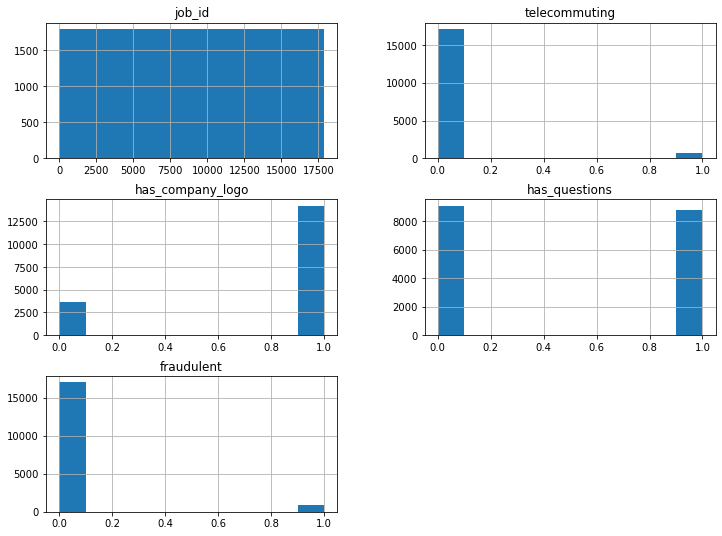

In [6]:
#Histogram for the data
df.hist(figsize=(12,9))

<AxesSubplot:>

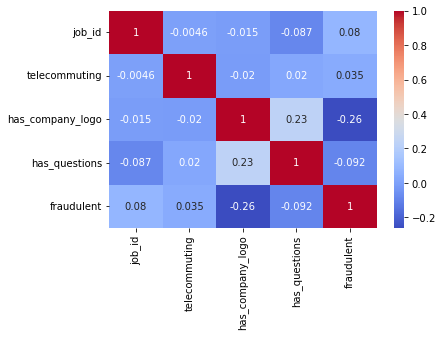

In [7]:
#Correlation matrix for num vars
corr_matx = df.corr()
#Heatmap for the corr matrix
import seaborn as sns
sns.heatmap(corr_matx, annot=True, cmap='coolwarm')

In [8]:
df.drop(['job_id' , 'salary_range' , 'telecommuting' , 'has_company_logo' , 'has_questions'] , axis = 1,inplace = True)
df.head()

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [9]:
# Check distribution of the target variable
print(df['fraudulent'].value_counts(normalize=True))

0    0.951566
1    0.048434
Name: fraudulent, dtype: float64


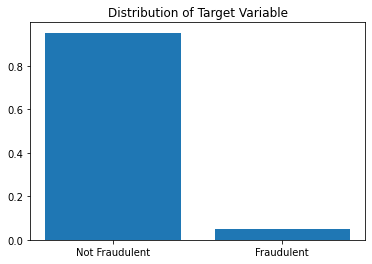

In [10]:
plt.bar(['Not Fraudulent', 'Fraudulent'], df['fraudulent'].value_counts(normalize=True))
plt.title('Distribution of Target Variable')
plt.show()

# Step 2: Data cleaning and preparation

In [11]:
#Filling  missing values
df.fillna(' ',inplace=True)
#check for any missing values
df.isnull().sum()

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [12]:
#remove duplicates
df.drop_duplicates(inplace=True)

In [13]:
#Visualize Job postings by countries 

def split(location):
  l =location.split(',')
  return l[0]

df['country'] =df.location.apply(split)  
df['country'].nunique()
df['country'].value_counts()[:11]

US    10445
GB     2327
GR      938
CA      449
DE      382
        341
NZ      330
IN      273
AU      213
PH      132
NL      126
Name: country, dtype: int64

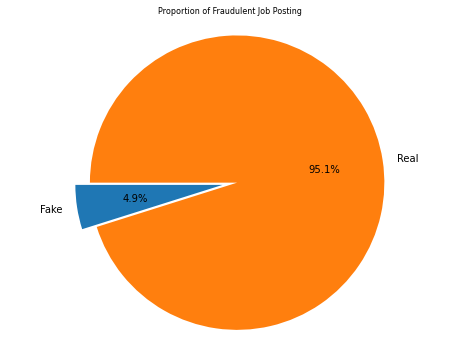

In [14]:
labels = 'Fake' ,'Real'

sizes = [df.fraudulent[df['fraudulent'] == 1].count() ,df.fraudulent[df['fraudulent'] == 0].count()]
explode =(0,0.1)

fig1 ,ax1 = plt.subplots(figsize =(8,6))
ax1.pie(sizes ,explode =explode, labels =labels, autopct ='%1.1f%%',startangle =180)

ax1.axis('equal')
plt.title("Proportion of Fraudulent Job Posting" ,size =8)
plt.show()

Text(0, 0.5, 'Number of Jobs')

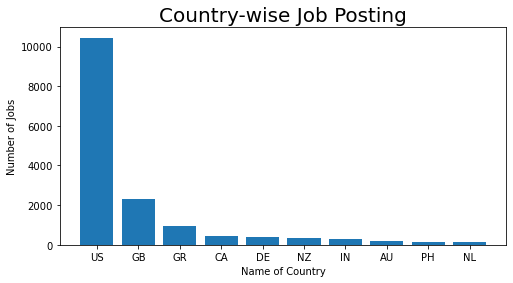

In [15]:
country =dict(df.country.value_counts()[:11])

del country[' ']
plt.figure(figsize=(8,4))

plt.title('Country-wise Job Posting',size=20)
plt.bar(country.keys(),country.values())

plt.xlabel('Name of Country')
plt.ylabel('Number of Jobs')

Text(0, 0.5, 'Number of Jobs')

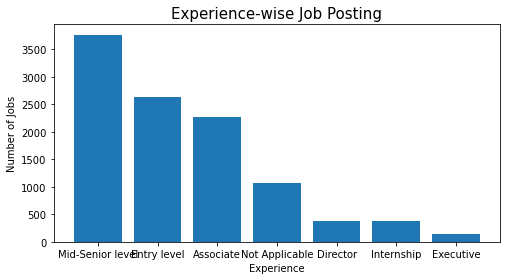

In [16]:
# Visualize Job posting by Experience 

experience =dict(df.required_experience.value_counts()[:11])

del experience[' ']
plt.figure(figsize=(8,4))

plt.title('Experience-wise Job Posting',size=15)
plt.bar(experience.keys(),experience.values())

plt.xlabel('Experience')
plt.ylabel('Number of Jobs')

Text(0, 0.5, 'Number of Jobs')

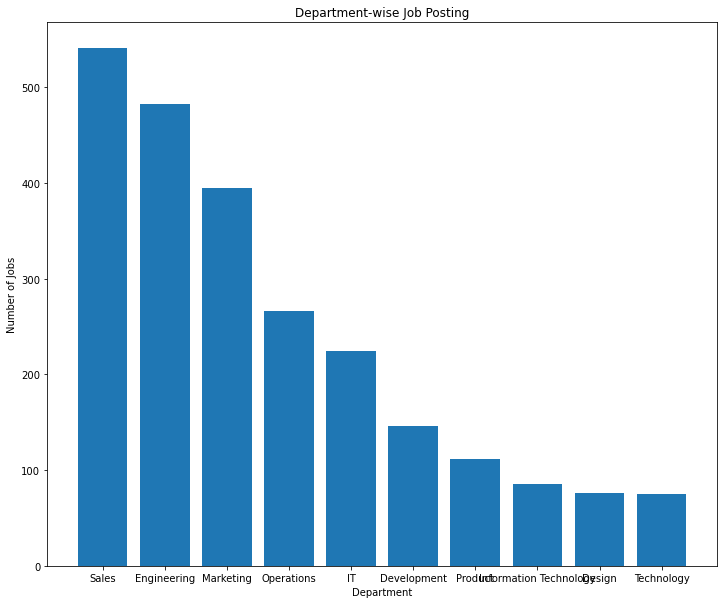

In [17]:
# Visualize Job posting by Department

department1 =dict(df.department.value_counts()[:11])

del department1[' ']
plt.figure(figsize=(12,10))

plt.title('Department-wise Job Posting',size=12) 
plt.bar(department1.keys(),department1.values())

plt.xlabel('Department')
plt.ylabel('Number of Jobs')

In [18]:
#Finding fake job titles
df.title.value_counts()[:11]

English Teacher Abroad                                309
Graduates: English Teacher Abroad (Conversational)    144
Customer Service Associate                            141
English Teacher Abroad                                 94
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Account Manager                                        74
Customer Service Associate - Part Time                 72
Web Developer                                          65
Project Manager                                        60
Graduates: English Teacher Abroad                      57
Name: title, dtype: int64

In [19]:
df[df.fraudulent == 1].title.value_counts()[:11]

Home Based Payroll Typist/Data Entry Clerks Positions Available         20
Cruise Staff Wanted *URGENT*                                            19
Data Entry Admin/Clerical Positions - Work From Home                    18
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Data Entry                                                               9
Agency Sales Managers $150-$175,000/yr                                   9
Name: title, dtype: int64

In [20]:
df[df.fraudulent == 0].title.value_counts()[:11]

English Teacher Abroad                                309
Graduates: English Teacher Abroad (Conversational)    144
Customer Service Associate                            141
English Teacher Abroad                                 94
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Account Manager                                        72
Customer Service Associate - Part Time                 72
Web Developer                                          65
Project Manager                                        60
Graduates: English Teacher Abroad                      57
Name: title, dtype: int64

In [21]:
df.columns

Index(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function', 'fraudulent', 'country'],
      dtype='object')

In [22]:
df['text'] = df['title'] + ' '+ df['location'] + ' ' + df['department'] + ' ' + df['company_profile'] + ' '+ df['description'] + ' ' + df['requirements'] + ' ' + df['benefits'] + ' ' + df['industry']

del df['title']
del df['location']
del df['department']
del df['company_profile']
del df['description']
del df['requirements']
del df['benefits']
del df['employment_type']
del df['required_experience']
del df['required_education']
del df['industry']
del df['function']
del df['country']

In [23]:
df.head()

,fraudulent,text
0,0,"Marketing Intern US, NY, New York Marketing We..."
1,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,"Bill Review Manager US, FL, Fort Worth SpotS..."


In [24]:
#word frequency
fake_post = ' '.join([text for text in df['text'][df['fraudulent'] == 1]])

real_post = ' '.join([text for text in df['text'][df['fraudulent']==0]])

In [25]:
import nltk
# nltk.download('stopwords')

from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [26]:
stop_words = set(stopwords.words("english"))

In [27]:
df['text'] = df['text'].apply(lambda x:x.lower())

In [28]:
df['text'] = df['text'].apply(lambda x:' '.join([word for word in x.split() if word not in(stop_words)]))

In [29]:
df['text'][0]

"marketing intern us, ny, new york marketing we're food52, we've created groundbreaking award-winning cooking site. support, connect, celebrate home cooks, give everything need one place.we top editorial, business, engineering team. we're focused using technology find new better ways connect people around specific food interests, offer superb, highly curated information food cooking. attract talented home cooks contributors country; also publish well-known professionals like mario batali, gwyneth paltrow, danny meyer. partnerships whole foods market random house.food52 named best food website james beard foundation iacp, featured new york times, npr, pando daily, techcrunch, today show.we're located chelsea, new york city. food52, fast-growing, james beard award-winning online food community crowd-sourced curated recipe hub, currently interviewing full- part-time unpaid interns work small team editors, executives, developers new york city headquarters.reproducing and/or repackaging exi

# Step 3: Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

X_train,X_test ,y_train,y_test = train_test_split(df.text, df.fraudulent ,test_size =0.3, random_state=42)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer()

In [32]:
# Convert the text data into vector format 
X_train_dtm = vect.transform(X_train)
X_train_dtm

<12306x86282 sparse matrix of type '<class 'numpy.int64'>'
	with 2286891 stored elements in Compressed Sparse Row format>

In [33]:
X_test_dtm = vect.transform(X_test)
X_test_dtm

<5275x86282 sparse matrix of type '<class 'numpy.int64'>'
	with 955864 stored elements in Compressed Sparse Row format>

# Step 4: Model Selection and Training

### 1.Naive Bayes Classifier 

In [34]:
from sklearn.naive_bayes import  MultinomialNB

In [35]:
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [37]:
from sklearn.metrics import accuracy_score ,confusion_matrix, precision_score, recall_score, f1_score

y_pred_nb = nb.predict(X_test_dtm)
accuracy = accuracy_score(y_test, y_pred_nb)
rounded_accuracy = round(accuracy * 100, 2)
print('Accuracy score for Naive Bayes:', rounded_accuracy,'%')

Accuracy score for Naive Bayes: 97.25 %


### 2.Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dt = DecisionTreeClassifier()
dt.fit(X_train_dtm,y_train)

DecisionTreeClassifier()

In [40]:
y_pred_dt = dt.predict(X_test_dtm)
accuracy = accuracy_score(y_test, y_pred_dt)
rounded_accuracy = round(accuracy * 100, 2)
print('Accuracy score for Decision Tree:', rounded_accuracy,'%')

Accuracy score for Decision Tree: 97.91 %


In [41]:
X_test.iloc[159]

'editor, digital business publication & website us, ca, carlsbad wdm group innovative, forward thinking digital company aimed bringing business executives up-to-date latest news, information trends across globe.aimed informing, engaging, educating interacting business executives world over, wdm group’s products takes in-depth look inter-country relations, trade tourism, prominent industries, success stories lessons learned business.with physical presence many world’s largest economies, wdm group abreast news developments occurring around clock. aim keep ears ground fingers pulse bring busy executives breakdown biggest interesting updates across world’s largest influential territories industries.with wdm group don’t read news, make it. wdm group, pioneer digital magazines web portals since 2007 currently seeking hire proven, experienced dedicated editor carlsbad office situated centerpoint plaza, great ‘reverse commute’ location 5 minutes east i5 palomar airport rd exit. position suppor

### 3.Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train_dtm, y_train)

LogisticRegression(max_iter=10000)

In [43]:
y_pred_lr = lr.predict(X_test_dtm) 
accuracy = accuracy_score(y_test, y_pred_lr)
rounded_accuracy = round(accuracy * 100, 2)
print('Accuracy score for Logistic Regression:', rounded_accuracy,'%')

Accuracy score for Logistic Regression: 98.33 %


In [44]:
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

rounded_accuracy = round(accuracy * 100, 2)
rounded_precision = round(precision * 100, 2)
rounded_recall = round(recall* 100, 2)
rounded_f1 = round(f1 * 100, 2)

print('Logistic Regression:')
print(f'Accuracy: {rounded_accuracy}%')
print(f'Precision: {rounded_precision}%')
print(f'Recall: {rounded_recall}%')
print(f'F1_score: {rounded_f1}%')

Logistic Regression:
Accuracy: 98.33%
Precision: 91.94%
Recall: 73.21%
F1_score: 81.51%


In [45]:
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

rounded_accuracy = round(accuracy * 100, 2)
rounded_precision = round(precision * 100, 2)
rounded_recall = round(recall* 100, 2)
rounded_f1 = round(f1 * 100, 2)

print('Decision Tree Classifier:')
print(f'Accuracy: {rounded_accuracy}%')
print(f'Precision: {rounded_precision}%')
print(f'Recall: {rounded_recall}%')
print(f'F1_score: {rounded_f1}%')

Decision Tree Classifier:
Accuracy: 97.91%
Precision: 85.07%
Recall: 70.94%
F1_score: 77.37%


In [46]:
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)

rounded_accuracy = round(accuracy * 100, 2)
rounded_precision = round(precision * 100, 2)
rounded_recall = round(recall* 100, 2)
rounded_f1 = round(f1 * 100, 2)

print('Naive Bayes Classifier:')
print(f'Accuracy: {rounded_accuracy}%')
print(f'Precision: {rounded_precision}%')
print(f'Recall: {rounded_recall}%')
print(f'F1_score: {rounded_f1}%')

Naive Bayes Classifier:
Accuracy: 97.25%
Precision: 87.5%
Recall: 52.83%
F1_score: 65.88%


### 4.Support Vector Machine Algorithm

In [47]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train_dtm,y_train)

SVC()

In [48]:
y_pred_svm = svm.predict(X_test_dtm)
accuracy = accuracy_score(y_test, y_pred_svm)
rounded_accuracy = round(accuracy * 100, 2)
print('Accuracy score for svm:', rounded_accuracy,'%')

Accuracy score for svm: 97.21 %


In [49]:
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

rounded_accuracy = round(accuracy * 100, 2)
rounded_precision = round(precision * 100, 2)
rounded_recall = round(recall* 100, 2)
rounded_f1 = round(f1 * 100, 2)

print('Support Vector Machine:')
print(f'Accuracy: {rounded_accuracy}%')
print(f'Precision: {rounded_precision}%')
print(f'Recall: {rounded_recall}%')
print(f'F1_score: {rounded_f1}%')

Support Vector Machine:
Accuracy: 97.21%
Precision: 98.36%
Recall: 45.28%
F1_score: 62.02%


### 5.Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

rfm = RandomForestClassifier()
rfm.fit(X_train_dtm,y_train)

RandomForestClassifier()

In [51]:
y_pred_rfm = rfm.predict(X_test_dtm)
accuracy = accuracy_score(y_test, y_pred_rfm)
rounded_accuracy = round(accuracy * 100, 2)
print('Accuracy score for rfm:', rounded_accuracy,'%')

Accuracy score for rfm: 97.88 %


In [52]:
accuracy = accuracy_score(y_test, y_pred_rfm)
precision = precision_score(y_test, y_pred_rfm)
recall = recall_score(y_test, y_pred_rfm)
f1 = f1_score(y_test, y_pred_rfm)

rounded_accuracy = round(accuracy * 100, 2)
rounded_precision = round(precision * 100, 2)
rounded_recall = round(recall* 100, 2)
rounded_f1 = round(f1 * 100, 2)

print('Random Forest Classifier:')
print(f'Accuracy: {rounded_accuracy}%')
print(f'Precision: {rounded_precision}%')
print(f'Recall: {rounded_recall}%')
print(f'F1_score: {rounded_f1}%')

Random Forest Classifier:
Accuracy: 97.88%
Precision: 99.35%
Recall: 58.11%
F1_score: 73.33%


## Evaluation metrics

### Logistic Regression:
Accuracy: 98.33%
Precision: 91.94%
Recall: 73.21%
F1_score: 81.51%

### Decision Tree Classifier:
Accuracy: 97.91%
Precision: 85.07%
Recall: 70.94%
F1_score: 77.37%


### Random Forest Classifier:
Accuracy: 97.88%
Precision: 99.35%
Recall: 58.11%
F1_score: 73.33%

### Naive Bayes Classifier:
Accuracy: 97.25%
Precision: 87.5%
Recall: 52.83%
F1_score: 65.88%

### Support Vector Machine:
Accuracy: 97.21%
Precision: 98.36%
Recall: 45.28%
F1_score: 62.02%

## Recall scores
#### Naive Bayes = 52.83%
#### Decision tree = 70.94%
#### SVM = 45.28%
#### Logistic Regression = 73.21%
#### Random Forest Classifier = 58.11%

## Considering accuracy and recall score,Logistic regression performs better than the rest
For the given problem at hand, recall_score is the metric considered more than the rest because it is crucial to identify as many fraudulent job postings as possible even if it means having some false positives. It also helps us to minimize the false negatives which means reducing the chances of missing fraudulent activities.

# Step 5: Fine tuning Hyperparameters

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression(max_iter=10000)

In [54]:
# Defining the hyperparameter grid for tuning
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

In [59]:
# Performing grid search with cross-validation
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring='recall', cv=6)
grid_search.fit(X_train_dtm, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
24 fits failed out of a total of 96.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueErr

GridSearchCV(cv=6, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='recall')

In [60]:
# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best model:", best_model)
print("Best Hyperparameters:", best_params)
print("Best score:", best_score)


Best model: LogisticRegression(C=100, max_iter=10000, penalty='l1', solver='liblinear')
Best Hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.7694805194805195


In [61]:
# Evaluation metrics for the best model on the test set
y_pred = best_model.predict(X_test_dtm)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

rounded_accuracy = round(accuracy * 100, 2)
rounded_precision = round(precision * 100, 2)
rounded_recall = round(recall* 100, 2)
rounded_f1 = round(f1 * 100, 2)

print(f'Accuracy: {rounded_accuracy}%')
print(f'Precision: {rounded_precision}%')
print(f'Recall: {rounded_recall}%')
print(f'F1_score: {rounded_f1}%')
best_model_score = best_model.score(X_test_dtm, y_test)

Accuracy: 98.29%
Precision: 89.59%
Recall: 74.72%
F1_score: 81.48%


## Final report about the results

The tuned model has an overall correctness(accuracy) of 98.29% and the recall score (senstivity rate) is 74.72%. This high recall_score indicates that the model is effective at capturing a large proportion of the actual positive samples in the dataset.The high level of accuracy achieved by the model indicates that it correctly predicted majority of the samples in the dataset. While achieving high accuracy is desirable, it is also important to have a reasonable level of recall to ensure the model can effectively identify positive cases.

# Group members

### KYOBE GEOFREY KIMULI - 2100716219 - 21/U/16219/EVE
### KAMUSIIME DAISY - 21007095950 - 21/U/05950/EVE
### NATUHWERA FRANCIS - 2100707319 - 21/U/07319/EVE
### KEMBABAZI SANDRA AINE - 2100712149 - 21/U/12149/PS
### MCJORDAN BISMARK - 2100705192 - 21/U/05192/EVE